In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
!pip install kaggle

In [2]:
#before running it, download kaggle.json api token from your kaggle account and upload in the files here

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:08<00:00, 24.5MB/s]
100% 163M/163M [00:08<00:00, 20.3MB/s]


In [4]:

# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Import dependencies**

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow  #shows image in a new window
from PIL import Image  #also an image processing library
from sklearn.model_selection import train_test_split

In [6]:
#listing all the files in the with_mask folder
with_mask = os.listdir('/content/data/with_mask')
print(with_mask[0:5])


['with_mask_921.jpg', 'with_mask_324.jpg', 'with_mask_1211.jpg', 'with_mask_572.jpg', 'with_mask_3226.jpg']


In [8]:
#listing all the files in the with_mask folder
without_mask = os.listdir('/content/data/without_mask')
print(without_mask[0:5])

['without_mask_399.jpg', 'without_mask_1690.jpg', 'without_mask_418.jpg', 'without_mask_1677.jpg', 'without_mask_443.jpg']


In [9]:
print('The number of mask images are: ', len(with_mask))
print('The number of without mask images are: ', len(without_mask))

The number of mask images are:  3725
The number of without mask images are:  3828


**Creating labels for images**

In [10]:
#creating list of labels

with_mask_labels = [1]*len(with_mask)

without_mask_labels = [0]*len(without_mask)

print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [11]:
#combining both lists

labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


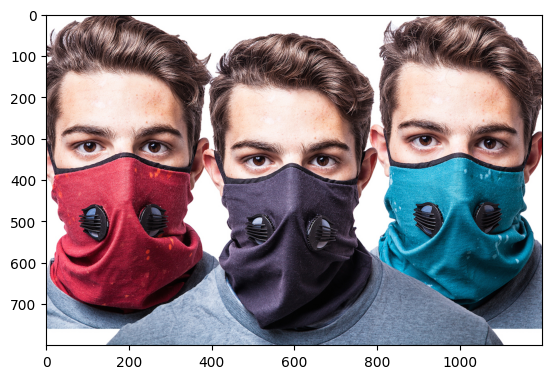

In [12]:
#displaying with mask image
image = mpimg.imread('/content/data/with_mask/with_mask_3315.jpg')
imgplot = plt.imshow(image)
plt.show()

**Image Processing**

1.   Resize the Images
2.   Convert the images to numpy arrays

In [13]:
#resizing and converting images into numpy

with_image_path = ('/content/data/with_mask/')

data = []

for img_file in with_mask:
  image = Image.open(with_image_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_image_path = ('/content/data/without_mask/')

for img_file in without_mask:
  image = Image.open(without_image_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
len(data)

7553

In [15]:
#converting labels and data into numpy array

X = np.array(data)
Y = np.array(labels)

In [16]:
type(X)

numpy.ndarray

In [17]:
print(X.shape)
print(Y.shape)

#X.shape shows number of arrays, height of image, width, and color channels

(7553, 128, 128, 3)
(7553,)


**Splitting into train and test**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
#Scaling images

X_train_scaled = X_train/255
X_test_scaled = X_test/255


array([[[108, 163, 221],
        [104, 162, 218],
        [101, 160, 214],
        ...,
        [198, 215, 232],
        [198, 215, 232],
        [198, 215, 233]],

       [[103, 159, 216],
        [104, 159, 217],
        [104, 159, 217],
        ...,
        [195, 215, 232],
        [194, 215, 232],
        [194, 215, 232]],

       [[105, 158, 219],
        [104, 157, 218],
        [103, 155, 216],
        ...,
        [191, 214, 231],
        [191, 214, 231],
        [191, 214, 231]],

       ...,

       [[129, 180, 200],
        [132, 179, 200],
        [133, 174, 193],
        ...,
        [ 88, 167, 224],
        [ 88, 167, 224],
        [ 89, 168, 225]],

       [[124, 173, 193],
        [129, 174, 193],
        [127, 163, 182],
        ...,
        [ 89, 168, 224],
        [ 91, 170, 226],
        [ 90, 170, 224]],

       [[123, 170, 188],
        [120, 161, 180],
        [119, 150, 171],
        ...,
        [ 91, 171, 226],
        [ 91, 169, 223],
        [ 92, 170, 224]]], dtype=uint8)
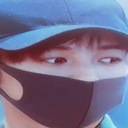

In [ ]:
X_train[0]

In [27]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.88627451, 0.89019608, 0.85882353],
        [0.88235294, 0.88627451, 0.85490196],
        [0.87843137, 0.88235294, 0.85098039]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.88627451, 0.89019608, 0.85882353],
        [0.88235294, 0.88627451, 0.85490196],
        [0.87843137, 0.88235294, 0.85098039]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.88627451, 0.89019608, 0.85882353],
        [0.88627451, 0.89019608, 0.85882353],
        [0.88235294, 0.88627451, 0.85490196]],

       ...,

       [[0.38431373, 0.25098039, 0.17647059],
        [0.48627451, 0.30980392, 0.21176471],
        [0.5372549 , 0

**Building a CNN**

In [23]:
import tensorflow as tf
from tensorflow import keras


In [24]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [28]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - acc: 0.7023 - loss: 0.8102 - val_acc: 0.9058 - val_loss: 0.2250
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8859 - loss: 0.2865 - val_acc: 0.9273 - val_loss: 0.1741
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9068 - loss: 0.2247 - val_acc: 0.9190 - val_loss: 0.1609
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9258 - loss: 0.2025 - val_acc: 0.9273 - val_loss: 0.1705
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9415 - loss: 0.1556 - val_acc: 0.9405 - val_loss: 0.1640


In [29]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9291 - loss: 0.1812
Test Accuracy =  0.9338186383247375


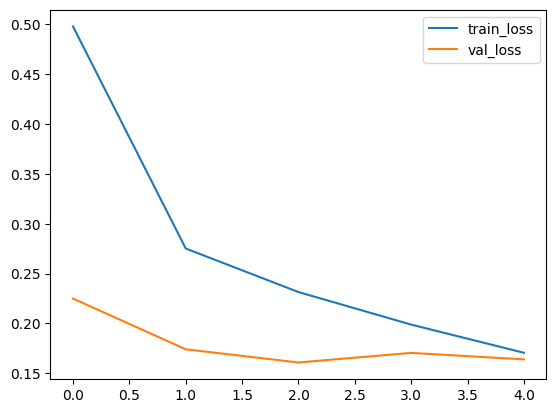

In [30]:
h = history

plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

**Prective system**

Enter the path of the image to be tested: /content/images (1).jpg


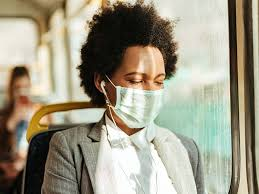

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.49165687 0.47742727]]
The person in the image is wearing a mask


In [36]:
input_image_path = input('Enter the path of the image to be tested: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')
